In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

%matplotlib inline

In [0]:
mb_size = 32
X_dim = 784
z_dim = 64
h_dim = 128
lr = 1e-3
d_steps = 3

In [3]:
mnist = input_data.read_data_sets('../../MNIST_data',one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../../MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../../MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ../../MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ../../MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as offi

In [0]:
def xavier_init(size):
  in_dim = size[0]
  xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
  return tf.random_normal(shape = size,stddev = xavier_stddev)

In [0]:
def log(x):
  return tf.log(x + 1e-8)

In [0]:
X = tf.placeholder(tf.float32,shape = [None,X_dim])
Z = tf.placeholder(tf.float32,shape = [None,z_dim])

D_w1 = tf.Variable(xavier_init([X_dim,h_dim]))
D_b1 = tf.Variable(tf.zeros(shape = [h_dim]))
D_w2 = tf.Variable(xavier_init([h_dim,1]))
D_b2 = tf.Variable(tf.zeros(shape = [1]))

G_w1 = tf.Variable(xavier_init([z_dim,h_dim]))
G_b1 = tf.Variable(tf.zeros(shape = [h_dim]))
G_w2 = tf.Variable(xavier_init([h_dim,X_dim]))
G_b2 = tf.Variable(tf.zeros(shape = [X_dim]))

theta_G = [G_w1,G_w2,G_b1,G_b2]
theta_D = [D_w1,D_w2,D_b1,D_b2]

In [0]:
def sample_z(m,n):
  return np.random.uniform(-1,1,size = [m,n])

In [0]:
def G(z):
  G_h1 = tf.nn.relu(tf.matmul(z,G_w1) + G_b1)
  G_log_prob = tf.matmul(G_h1,G_w2) + G_b2
  G_prob = tf.nn.sigmoid(G_log_prob)

  return G_prob

def D(X):
  D_h1 = tf.nn.relu(tf.matmul(X,D_w1) + D_b1)
  out = tf.matmul(D_h1,D_w2) + D_b2
  return out

In [0]:
G_sample = G(Z)
D_real = D(X)
D_fake = D(G_sample)

D_target = 1. / mb_size
G_target = 1. / mb_size*2

In [0]:
z = tf.reduce_sum(tf.exp(-D_real)) + tf.reduce_sum(tf.exp(-D_fake))

D_loss = tf.reduce_sum(D_target * D_real) + log(Z)
G_loss = tf.reduce_sum(G_target * D_real) + tf.reduce_sum(G_target * D_fake) + log(Z)

In [0]:
D_solver = (tf.train.AdamOptimizer(learning_rate=lr)
            .minimize(D_loss, var_list=theta_D))
G_solver = (tf.train.AdamOptimizer(learning_rate=lr)
            .minimize(G_loss, var_list=theta_G))

Iter: 0 
Iter: 1000 
Iter: 2000 
Iter: 3000 
Iter: 4000 
Iter: 5000 
Iter: 6000 
Iter: 7000 
Iter: 8000 
Iter: 9000 
Iter: 10000 


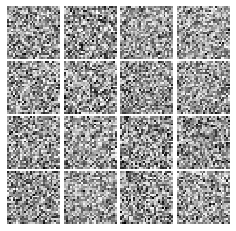

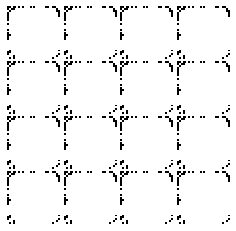

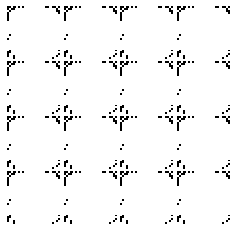

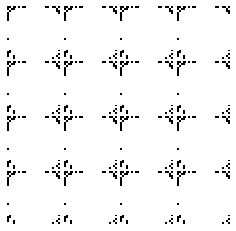

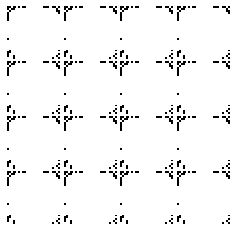

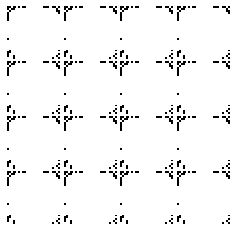

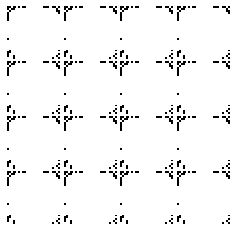

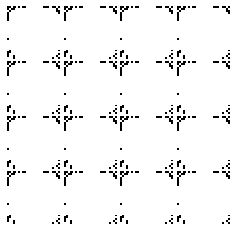

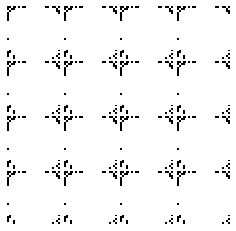

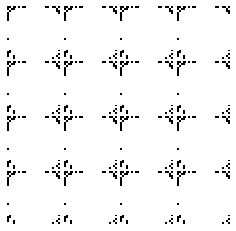

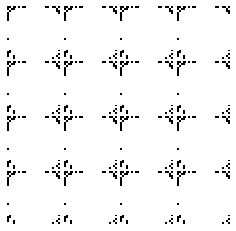

In [40]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for it in range(10001):
  X_mb,_ = mnist.train.next_batch(mb_size)
  z_mb = sample_z(mb_size,z_dim)

  _,D_loss_curr = sess.run([D_solver,D_loss],
                           feed_dict = {X:X_mb,Z:z_mb})
  _,G_loss_curr = sess.run([G_solver,G_loss],
                           feed_dict = {X:X_mb,Z:z_mb})
  if it % 1000 == 0:
    print("Iter: {} ".format(it))

    samples = sess.run(G_sample,feed_dict = {Z:sample_z(16,z_dim)})
    fig = plot(samples)
sess.close()

In [0]:
def plot(samples):
    import matplotlib.gridspec as gridspec
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')

    return fig

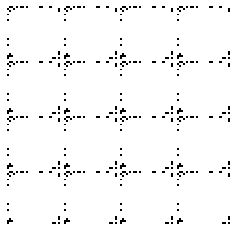

In [36]:
fig = plot(samples)
fig.show()

Extracting ../../MNIST_data/train-images-idx3-ubyte.gz
Extracting ../../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../MNIST_data/t10k-labels-idx1-ubyte.gz
Iter: 0; D_loss: 4.632; G_loss: 4.351
Iter: 1000; D_loss: 3.547; G_loss: 5.228
Iter: 2000; D_loss: 3.708; G_loss: 4.742
Iter: 3000; D_loss: 3.623; G_loss: 4.93
Iter: 4000; D_loss: 3.714; G_loss: 4.736
Iter: 5000; D_loss: 3.688; G_loss: 4.666
Iter: 6000; D_loss: 3.7; G_loss: 4.814
Iter: 7000; D_loss: 3.694; G_loss: 4.691
Iter: 8000; D_loss: 3.847; G_loss: 4.653
Iter: 9000; D_loss: 3.793; G_loss: 4.627
Iter: 10000; D_loss: 3.781; G_loss: 4.594
Iter: 11000; D_loss: 3.774; G_loss: 4.509
Iter: 12000; D_loss: 3.755; G_loss: 4.652
Iter: 13000; D_loss: 3.753; G_loss: 4.666
Iter: 14000; D_loss: 3.836; G_loss: 4.489
Iter: 15000; D_loss: 3.731; G_loss: 4.555
Iter: 16000; D_loss: 3.814; G_loss: 4.549
Iter: 17000; D_loss: 3.962; G_loss: 4.498
Iter: 18000; D_loss: 3.741; G_loss: 4.607


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Iter: 21000; D_loss: 3.823; G_loss: 4.489
Iter: 22000; D_loss: 3.837; G_loss: 4.57
Iter: 23000; D_loss: 3.835; G_loss: 4.473
Iter: 24000; D_loss: 3.857; G_loss: 4.583
Iter: 25000; D_loss: 3.817; G_loss: 4.528
Iter: 26000; D_loss: 3.894; G_loss: 4.476
Iter: 27000; D_loss: 3.859; G_loss: 4.496
Iter: 28000; D_loss: 3.861; G_loss: 4.516
Iter: 29000; D_loss: 3.914; G_loss: 4.491
Iter: 30000; D_loss: 3.891; G_loss: 4.474
Iter: 31000; D_loss: 3.796; G_loss: 4.468
Iter: 32000; D_loss: 3.798; G_loss: 4.494
Iter: 33000; D_loss: 3.867; G_loss: 4.552
Iter: 34000; D_loss: 3.857; G_loss: 4.445
Iter: 35000; D_loss: 3.839; G_loss: 4.504
Iter: 36000; D_loss: 3.796; G_loss: 4.504
Iter: 37000; D_loss: 3.825; G_loss: 4.522
Iter: 38000; D_loss: 3.815; G_loss: 4.484
Iter: 39000; D_loss: 3.919; G_loss: 4.655
Iter: 40000; D_loss: 3.906; G_loss: 4.544
Iter: 41000; D_loss: 3.747; G_loss: 4.597
Iter: 42000; D_loss: 3.816; G_loss: 4.572
Iter: 43000; D_loss: 3.792; G_loss: 4.634
Iter: 44000; D_loss: 3.799; G_loss:

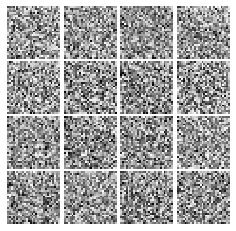

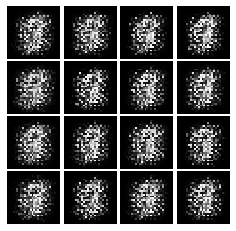

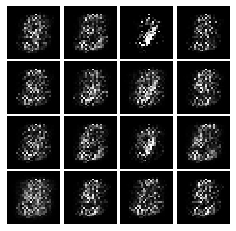

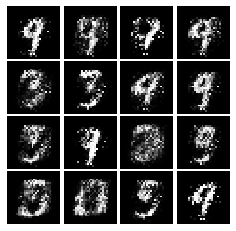

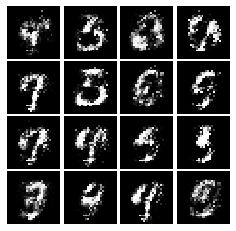

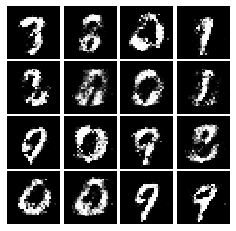

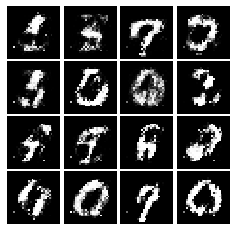

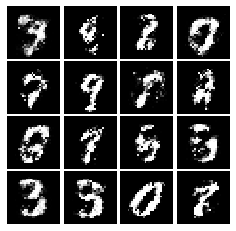

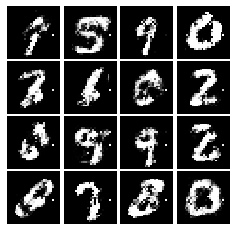

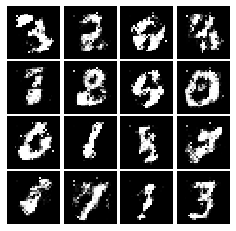

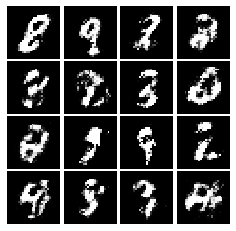

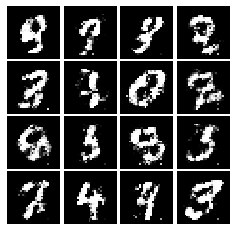

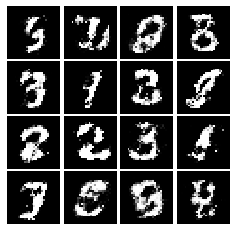

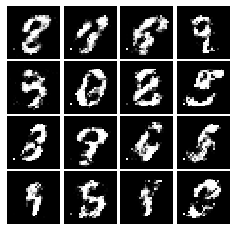

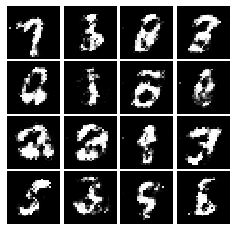

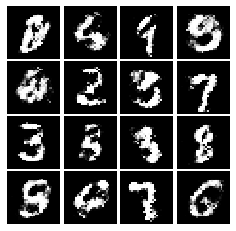

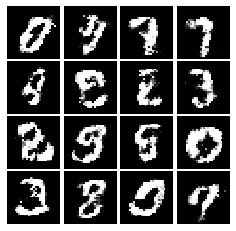

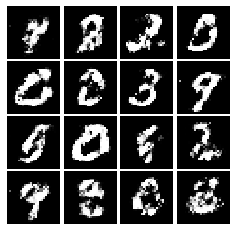

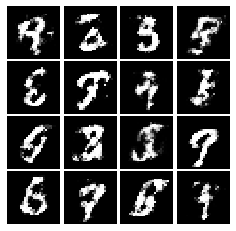

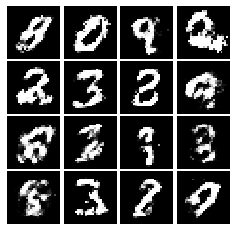

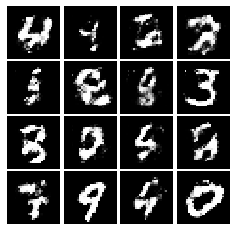

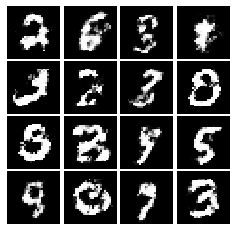

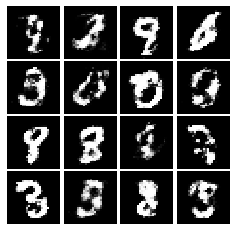

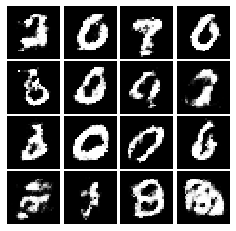

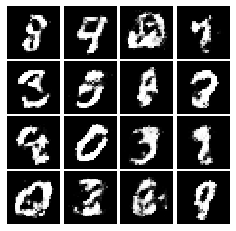

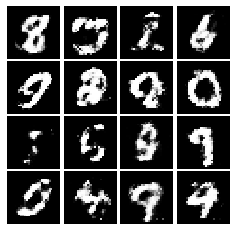

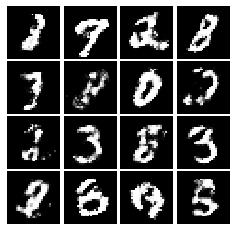

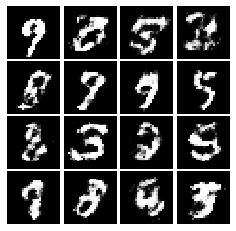

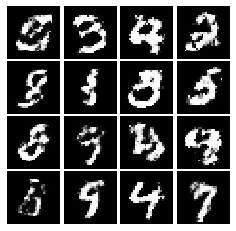

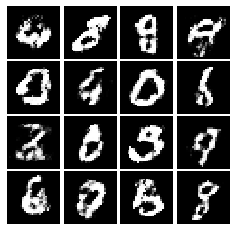

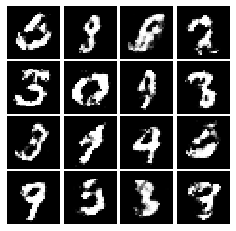

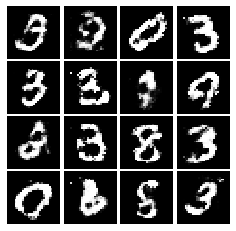

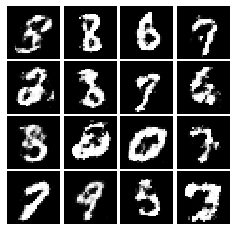

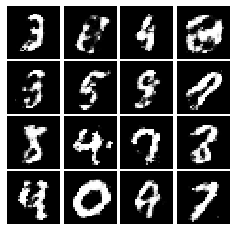

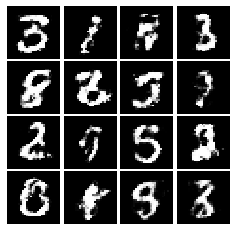

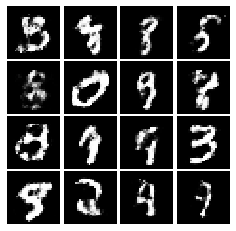

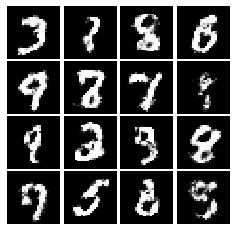

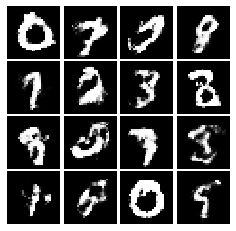

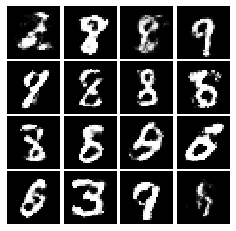

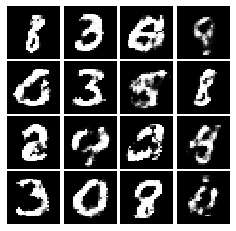

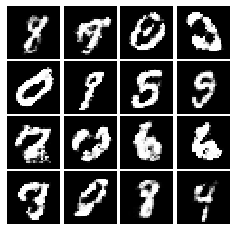

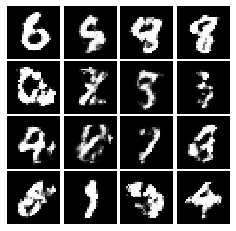

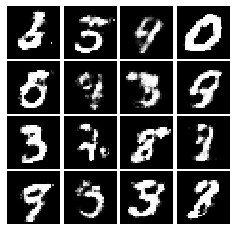

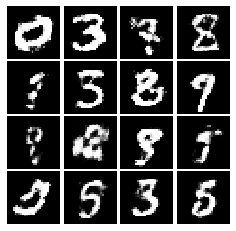

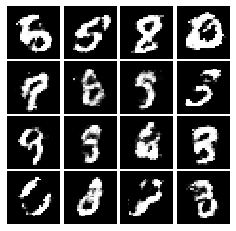

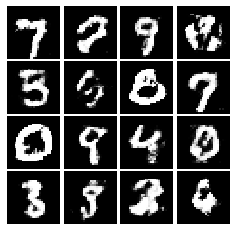

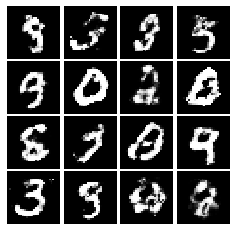

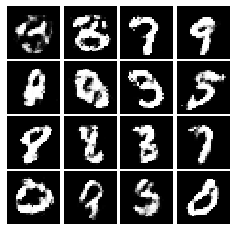

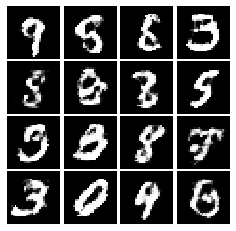

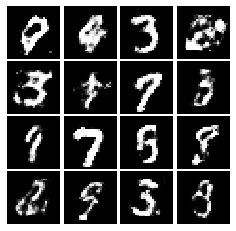

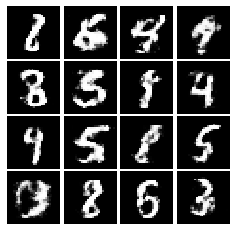

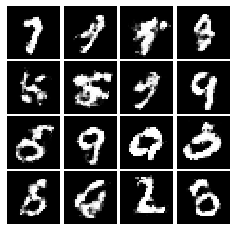

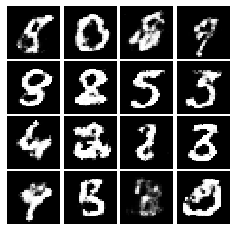

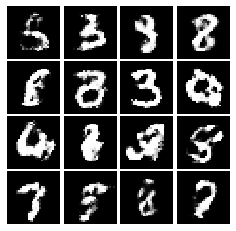

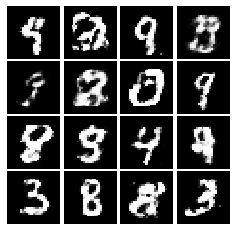

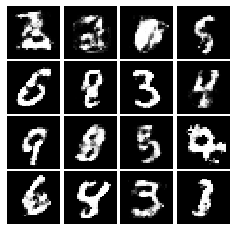

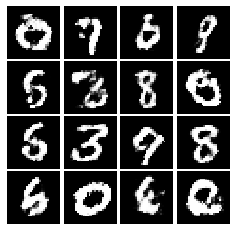

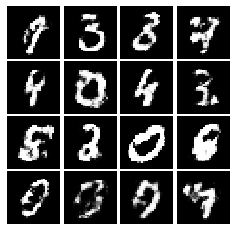

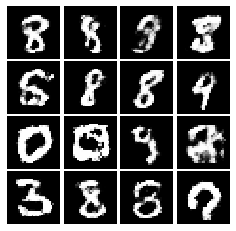

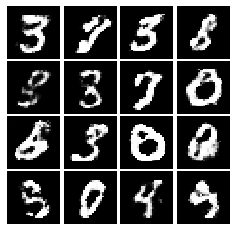

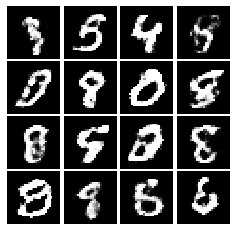

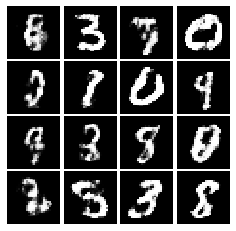

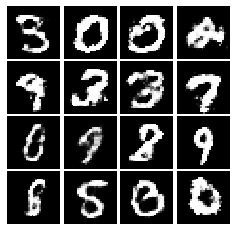

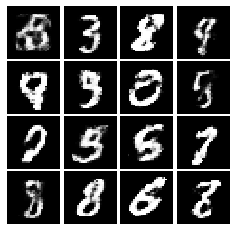

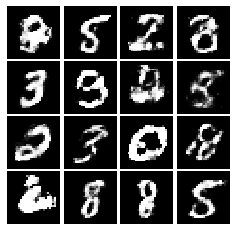

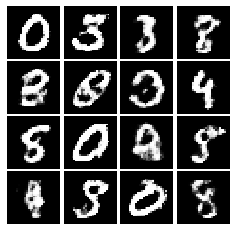

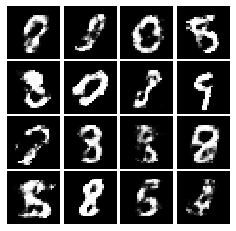

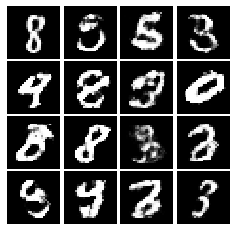

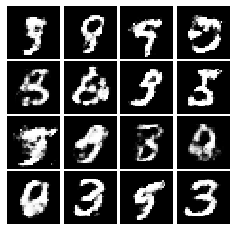

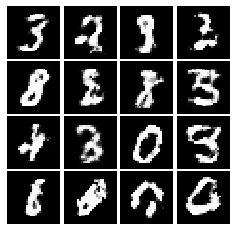

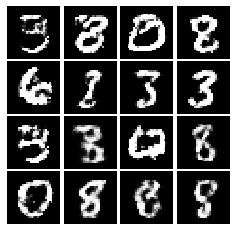

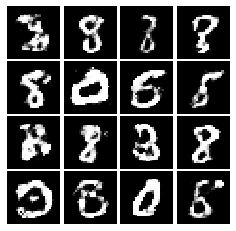

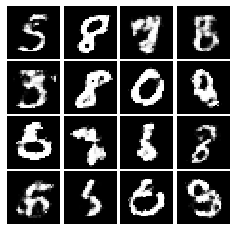

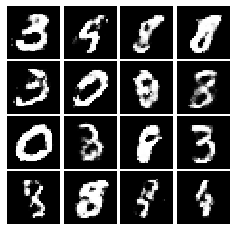

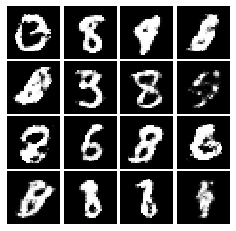

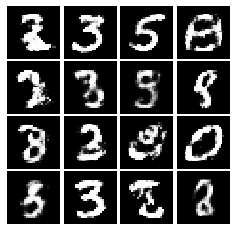

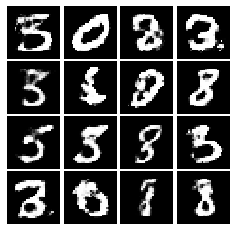

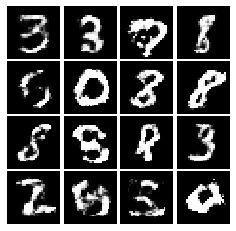

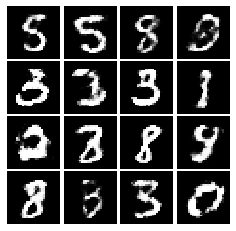

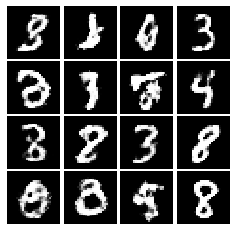

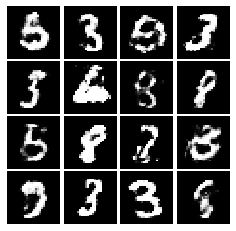

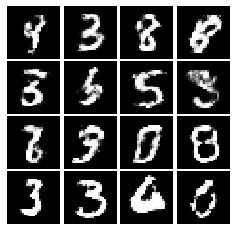

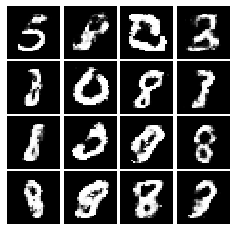

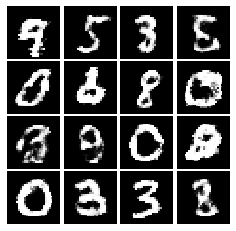

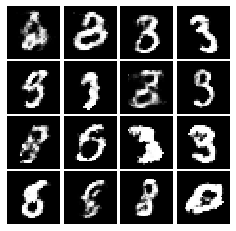

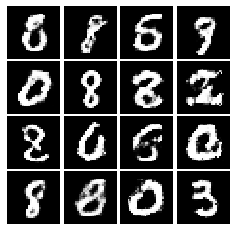

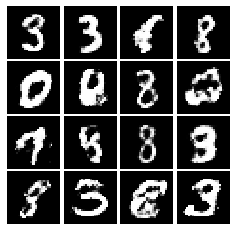

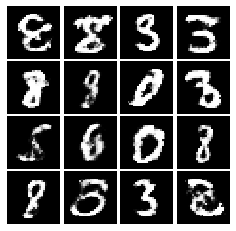

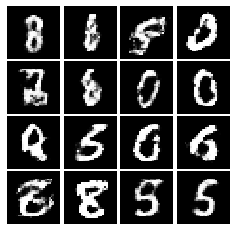

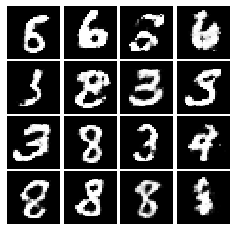

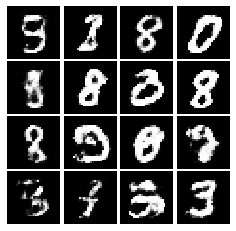

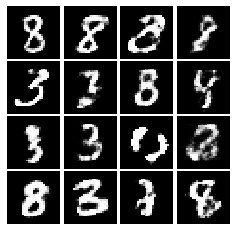

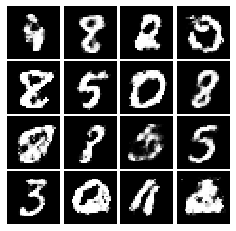

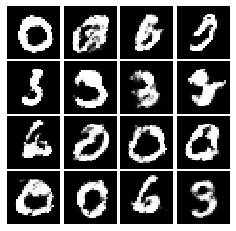

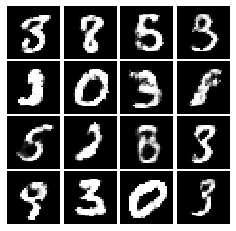

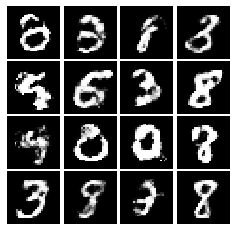

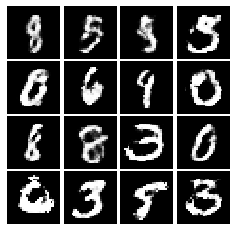

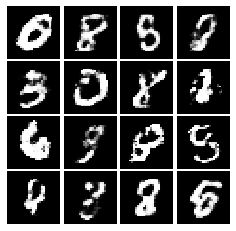

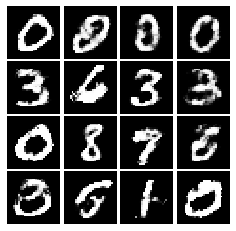

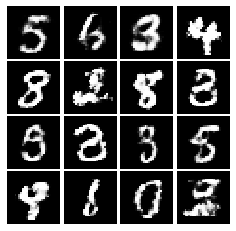

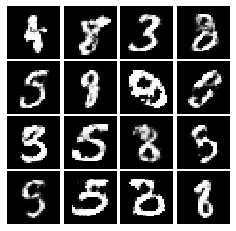

In [43]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os


mb_size = 32
X_dim = 784
z_dim = 64
h_dim = 128
lr = 1e-3
d_steps = 3

mnist = input_data.read_data_sets('../../MNIST_data', one_hot=True)


def plot(samples):
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')

    return fig


def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
    return tf.random_normal(shape=size, stddev=xavier_stddev)


def log(x):
    return tf.log(x + 1e-8)


X = tf.placeholder(tf.float32, shape=[None, X_dim])
z = tf.placeholder(tf.float32, shape=[None, z_dim])

D_W1 = tf.Variable(xavier_init([X_dim, h_dim]))
D_b1 = tf.Variable(tf.zeros(shape=[h_dim]))
D_W2 = tf.Variable(xavier_init([h_dim, 1]))
D_b2 = tf.Variable(tf.zeros(shape=[1]))

G_W1 = tf.Variable(xavier_init([z_dim, h_dim]))
G_b1 = tf.Variable(tf.zeros(shape=[h_dim]))
G_W2 = tf.Variable(xavier_init([h_dim, X_dim]))
G_b2 = tf.Variable(tf.zeros(shape=[X_dim]))

theta_G = [G_W1, G_W2, G_b1, G_b2]
theta_D = [D_W1, D_W2, D_b1, D_b2]


def sample_z(m, n):
    return np.random.uniform(-1., 1., size=[m, n])


def G(z):
    G_h1 = tf.nn.relu(tf.matmul(z, G_W1) + G_b1)
    G_log_prob = tf.matmul(G_h1, G_W2) + G_b2
    G_prob = tf.nn.sigmoid(G_log_prob)
    return G_prob


def D(X):
    D_h1 = tf.nn.relu(tf.matmul(X, D_W1) + D_b1)
    out = tf.matmul(D_h1, D_W2) + D_b2
    return out


G_sample = G(z)

D_real = D(X)
D_fake = D(G_sample)

D_target = 1./mb_size
G_target = 1./(mb_size*2)

Z = tf.reduce_sum(tf.exp(-D_real)) + tf.reduce_sum(tf.exp(-D_fake))

D_loss = tf.reduce_sum(D_target * D_real) + log(Z)
G_loss = tf.reduce_sum(G_target * D_real) + tf.reduce_sum(G_target * D_fake) + log(Z)

D_solver = (tf.train.AdamOptimizer(learning_rate=lr)
            .minimize(D_loss, var_list=theta_D))
G_solver = (tf.train.AdamOptimizer(learning_rate=lr)
            .minimize(G_loss, var_list=theta_G))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for it in range(100001):
    X_mb, _ = mnist.train.next_batch(mb_size)
    z_mb = sample_z(mb_size, z_dim)

    _, D_loss_curr = sess.run(
        [D_solver, D_loss], feed_dict={X: X_mb, z: z_mb}
    )

    _, G_loss_curr = sess.run(
        [G_solver, G_loss], feed_dict={X: X_mb, z: z_mb}
    )

    if it % 1000 == 0:
        print('Iter: {}; D_loss: {:.4}; G_loss: {:.4}'
              .format(it, D_loss_curr, G_loss_curr))

        samples = sess.run(G_sample, feed_dict={z: sample_z(16, z_dim)})

        fig = plot(samples)
        fig.show()


In [0]:
g